<a href="https://colab.research.google.com/github/LlakmalGamage/Diabetic-Retinopathy/blob/main/diabetic_retinopathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"lankalakmal","key":"a340704b4c041cbe8c4e87e86c446666"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle\ \(1\).json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle\ \(1\).json

In [ ]:
! kaggle datasets download -d sovitrath/diabetic-retinopathy-224x224-gaussian-filtered

Dataset URL: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered
License(s): CC0-1.0
 99% 424M/427M [00:11<00:00, 39.1MB/s]
100% 427M/427M [00:11<00:00, 40.2MB/s]


In [ ]:
!unzip diabetic-retinopathy-224x224-gaussian-filtered.zip -d /content/diabetic_retinopathy

Archive:  diabetic-retinopathy-224x224-gaussian-filtered.zip
  inflating: /content/diabetic_retinopathy/gaussian_filtered_images/gaussian_filtered_images/Mild/0024cdab0c1e.png  
  inflating: /content/diabetic_retinopathy/gaussian_filtered_images/gaussian_filtered_images/Mild/00cb6555d108.png  
  inflating: /content/diabetic_retinopathy/gaussian_filtered_images/gaussian_filtered_images/Mild/0124dffecf29.png  
  inflating: /content/diabetic_retinopathy/gaussian_filtered_images/gaussian_filtered_images/Mild/01b3aed3ed4c.png  
  inflating: /content/diabetic_retinopathy/gaussian_filtered_images/gaussian_filtered_images/Mild/0369f3efe69b.png  
  inflating: /content/diabetic_retinopathy/gaussian_filtered_images/gaussian_filtered_images/Mild/03e25101e8e8.png  
  inflating: /content/diabetic_retinopathy/gaussian_filtered_images/gaussian_filtered_images/Mild/04ac765f91a1.png  
  inflating: /content/diabetic_retinopathy/gaussian_filtered_images/gaussian_filtered_images/Mild/059bc89df7f4.png  
  i

In [ ]:
import shutil
import os

base_dir = '/content/diabetic_retinopathy/gaussian_filtered_images/gaussian_filtered_images'
checkpoints_dir = os.path.join(base_dir, '.ipynb_checkpoints')

if os.path.exists(checkpoints_dir):
    shutil.rmtree(checkpoints_dir)
    print(".ipynb_checkpoints directory removed.")
else:
    print(".ipynb_checkpoints directory does not exist.")

.ipynb_checkpoints directory removed.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator for data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of the data for validation
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
class_names = list(train_generator.class_indices.keys())
print("Class names: ", class_names)

Class names:  ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Load the InceptionV3 model pre-trained on ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)  # Assuming 5 classes for diabetic retinopathy

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0][0

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])



# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/30
92/92 [==============================] - 107s 1s/step - loss: 1.0511 - accuracy: 0.6721 - val_loss: 0.7848 - val_accuracy: 0.7031
Epoch 2/30
92/92 [==============================] - 90s 981ms/step - loss: 0.7523 - accuracy: 0.7253 - val_loss: 0.7334 - val_accuracy: 0.7250
Epoch 3/30
92/92 [==============================] - 87s 952ms/step - loss: 0.7234 - accuracy: 0.7376 - val_loss: 0.6780 - val_accuracy: 0.7483
Epoch 4/30
92/92 [==============================] - 87s 943ms/step - loss: 0.7086 - accuracy: 0.7346 - val_loss: 0.6625 - val_accuracy: 0.7551
Epoch 5/30
92/92 [==============================] - 86s 938ms/step - loss: 0.6926 - accuracy: 0.7387 - val_loss: 0.6769 - val_accuracy: 0.7647
Epoch 6/30
92/92 [==============================] - 91s 984ms/step - loss: 0.6793 - accuracy: 0.7544 - val_loss: 0.6612 - val_accuracy: 0.7551
Epoch 7/30
92/92 [==============================] - 86s 928ms/step - loss: 0.6808 - accuracy: 0.7492 - val_loss: 0.6454 - val_accuracy: 0.7510
E

In [ ]:
# Unfreeze all layers
for layer in base_model.layers:
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(3e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training with fine-tuning
history_fine = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/30
92/92 [==============================] - 127s 1s/step - loss: 0.3823 - accuracy: 0.8519 - val_loss: 0.5104 - val_accuracy: 0.8208
Epoch 2/30
92/92 [==============================] - 98s 1s/step - loss: 0.3428 - accuracy: 0.8683 - val_loss: 0.5098 - val_accuracy: 0.8276
Epoch 3/30
92/92 [==============================] - 100s 1s/step - loss: 0.3157 - accuracy: 0.8830 - val_loss: 0.4868 - val_accuracy: 0.8427
Epoch 4/30
92/92 [==============================] - 98s 1s/step - loss: 0.2935 - accuracy: 0.8901 - val_loss: 0.5178 - val_accuracy: 0.8140
Epoch 5/30
92/92 [==============================] - 101s 1s/step - loss: 0.2851 - accuracy: 0.8939 - val_loss: 0.5109 - val_accuracy: 0.8167
Epoch 6/30
92/92 [==============================] - 100s 1s/step - loss: 0.2589 - accuracy: 0.9024 - val_loss: 0.5149 - val_accuracy: 0.8413
Epoch 7/30
92/92 [==============================] - 98s 1s/step - loss: 0.2349 - accuracy: 0.9137 - val_loss: 0.5037 - val_accuracy: 0.8304
Epoch 8/30
92/92

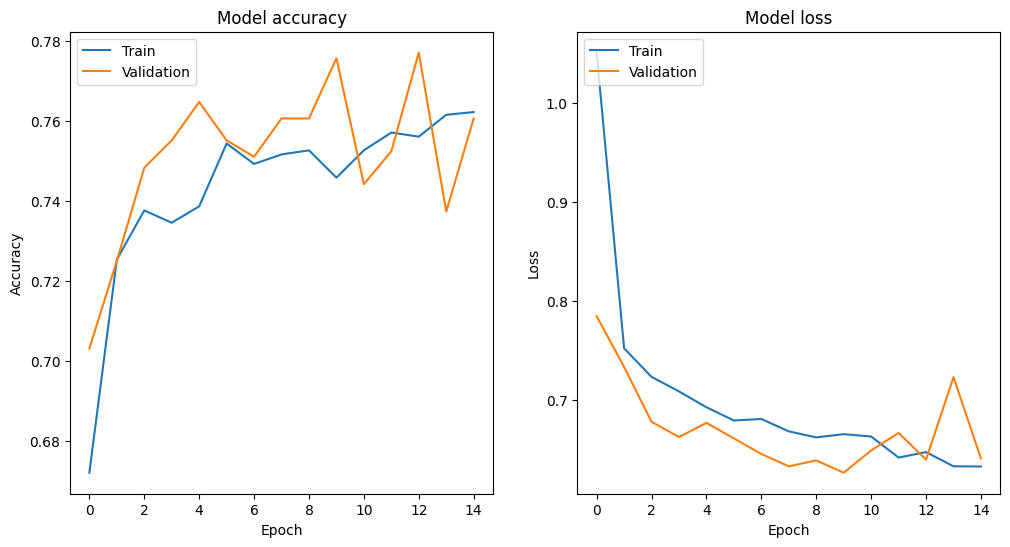

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Save the model to an HDF5 file
model.save('diabetic_retinopathy_model.h5')
print("Model saved as diabetic_retinopathy_model.h5")

from google.colab import files

# Download the model file
files.download('diabetic_retinopathy_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as diabetic_retinopathy_model.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Make predictions on validation data
y_true = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
class_names = list(validation_generator.class_indices.keys())
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)

23/23 [==============================] - 18s 722ms/step
                precision    recall  f1-score   support

          Mild       0.13      0.12      0.12        74
      Moderate       0.29      0.36      0.32       199
         No_DR       0.50      0.50      0.50       361
Proliferate_DR       0.08      0.05      0.06        59
        Severe       0.00      0.00      0.00        38

      accuracy                           0.36       731
     macro avg       0.20      0.21      0.20       731
  weighted avg       0.34      0.36      0.35       731

[[  9  25  36   4   0]
 [ 18  71  94  13   3]
 [ 36 121 180  14  10]
 [  5  19  29   3   3]
 [  2   9  24   3   0]]
